Метод OLS: w = 2.9080, b = 20.5221


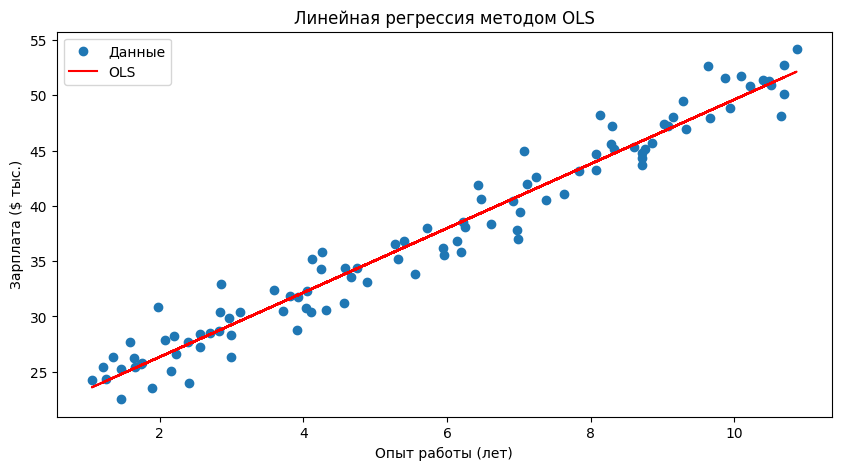

Финальное значение MSE (OLS): 3.2263
Качество модели (R^2) OLS: 0.9583


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетических данных (опыт работы -> зарплата)
np.random.seed(42)
X = 1 + 10 * np.random.rand(100, 1)  # Опыт работы в годах
y = 20 + 3 * X + np.random.randn(100, 1) * 2  # Зарплата с шумом

# Добавление столбца единиц для смещения (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Метод наименьших квадратов (OLS)
w_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
b_ols, w_ols = w_ols.flatten()
print(f"Метод OLS: w = {w_ols:.4f}, b = {b_ols:.4f}")

# Вычисление предсказаний OLS
y_pred_ols = X_b.dot(np.array([[b_ols], [w_ols]]))

# Визуализация данных и предсказаний
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Данные")
plt.plot(X, y_pred_ols, color='red', label="OLS")
plt.xlabel("Опыт работы (лет)")
plt.ylabel("Зарплата ($ тыс.)")
plt.legend()
plt.title("Линейная регрессия методом OLS")
plt.show()

# Функция потерь (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Вывод MSE
final_mse_ols = mse(y, y_pred_ols)
print(f"Финальное значение MSE (OLS): {final_mse_ols:.4f}")

# Оценка качества модели (R^2)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_ols = r2_score(y, y_pred_ols)
print(f"Качество модели (R^2) OLS: {r2_ols:.4f}")
